In [1]:
import datetime

from model import *
from random_search import *
from grid_search import *
from experiment_helper import *
from bayesian_optimizer import *

%load_ext autoreload
%autoreload 2

In [2]:
### Experiment 3: Complete tuning

In [3]:
# fixed parameters
num_layers = 2
num_hidden = 100
num_epochs = 300
mini_batch_size=50

# variable parameters
lr_min, lr_max, lr_n = 0.0001,1, 5
momentum_min, momentum_max, momentum_n = 0.0, 1.0, 10

lr = 0.1
momentum = 0.9

# variable parameters
num_hidden_min, num_hidden_max, num_hidden_n = 2, 512, 9
num_layers_min, num_layers_max, num_layers_n = 2, 6, 5

# experiment parameters
seed = 0
num_trials = 45
n=5

In [4]:
#### Random search

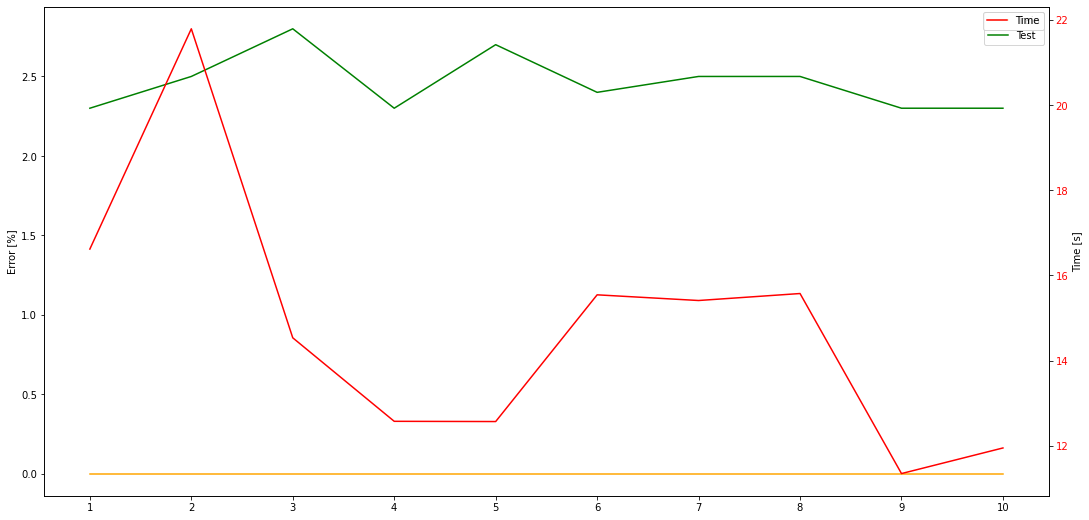

In [5]:
parameters_range = {'lr': (lr_min, lr_max, 'loguniform_10'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size,  'fixed'),
                    'momentum': (momentum_min, momentum_max,  'uniform'),
                    'num_hidden': (num_hidden, num_hidden, 'fixed'),
                    'num_layers': (num_layers, num_layers, 'fixed'),
                    'num_epochs': (num_epochs, num_epochs, 'fixed')}

parameters = random_hyperparameters(parameters_range,num_trials, seed)
res=[]
for i in range(n):
    results = random_search(parameters)
    param,r =choose_best_hyoerparam(results)
    res.append(r)
    parameters_range = {'lr': (param['lr'], param['lr'], 'fixed'),
                    'mini_batch_size': (param['mini_batch_size'], param['mini_batch_size'], 'fixed'),
                    'momentum': (param['momentum'], param['momentum'], 'fixed'),
                    'num_hidden': (num_hidden_min, num_hidden_max, 'discrete'),
                    'num_layers': (num_layers_min, num_layers_max, 'discrete'),
                    'num_epochs': (num_epochs, num_epochs, 'fixed')}
    parameters = random_hyperparameters(parameters_range,num_trials, i)
    
    results = random_search(parameters)
    param, r=choose_best_hyoerparam(results)
    res.append(r)
    parameters_range = {'lr': (lr_min, lr_max, 'loguniform_10'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size,  'fixed'),
                    'momentum': (momentum_min, momentum_max,  'uniform'),
                    'num_hidden': (param['num_hidden'], param['num_hidden'], 'fixed'),
                    'num_layers': (param['num_layers'], param['num_layers'], 'fixed'),
                    'num_epochs': (param['num_epochs'], param['num_epochs'], 'fixed')}

    parameters = random_hyperparameters(parameters_range,num_trials, i)
    
visualize_experiment(res,'random3-')

In [6]:
#### Grid search

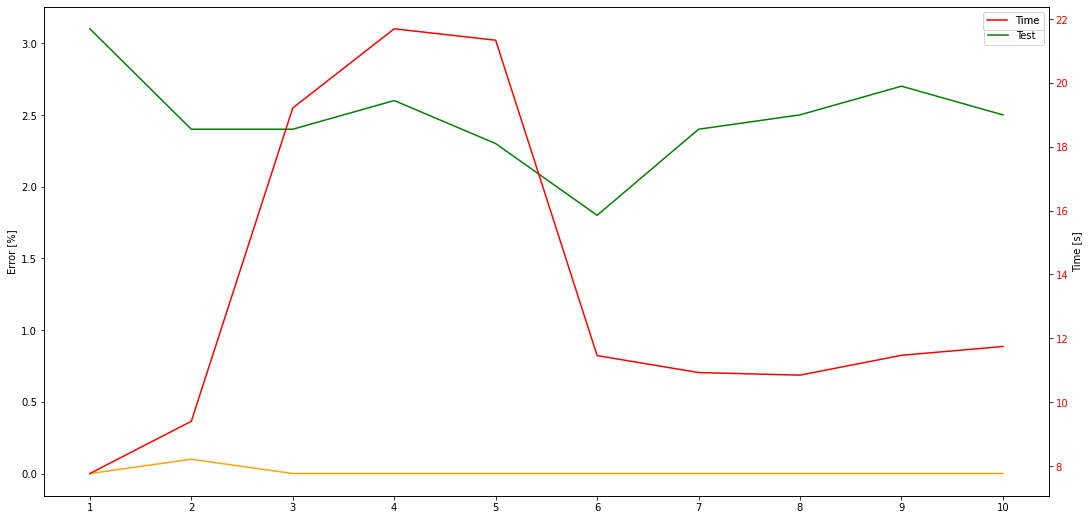

In [7]:
parameters_range = {'lr': (lr_min, lr_max, lr_n, 'logspace_10'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size, 1, 'fixed'),
                    'momentum': (momentum_min, momentum_max, momentum_n, 'linspace'),
                    'num_hidden': (num_hidden, num_hidden, 1, 'fixed'),
                    'num_layers': (num_layers, num_layers, 1, 'fixed'),
                    'num_epochs': (num_epochs, num_epochs, 1, 'fixed')}
parameters = grid_hyperparameters(parameters_range)
res=[]
for i in range(n):
    results = grid_search(parameters)
    param,r =choose_best_hyoerparam(results)
    res.append(r)
    parameters_range = {'lr': (param['lr'], param['lr'],1, 'fixed'),
                    'mini_batch_size': (param['mini_batch_size'], param['mini_batch_size'],1, 'fixed'),
                    'momentum': (param['momentum'], param['momentum'],1, 'fixed'),
                    'num_hidden': (num_hidden_min, num_hidden_max,num_hidden_n, 'discrete_linspace'),
                    'num_layers': (num_layers_min, num_layers_max,num_layers_n, 'discrete_linspace'),
                    'num_epochs': (num_epochs, num_epochs,1, 'fixed')}
    parameters = grid_hyperparameters(parameters_range)
    
    results = grid_search(parameters)
    param, r=choose_best_hyoerparam(results)
    res.append(r)
    parameters_range = {'lr': (lr_min, lr_max,lr_n, 'logspace_10'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size,1,  'fixed'),
                    'momentum': (momentum_min, momentum_max,momentum_n,  'linspace'),
                    'num_hidden': (param['num_hidden'], param['num_hidden'],1, 'fixed'),
                    'num_layers': (param['num_layers'], param['num_layers'],1, 'fixed'),
                    'num_epochs': (param['num_epochs'], param['num_epochs'],1, 'fixed')}

    parameters = grid_hyperparameters(parameters_range)
    
visualize_experiment(res,'grid3-')

In [8]:
#### Bayesian optimisation

In [4]:
parameters_range = {'lr': (lr_min, lr_max, lr_n, 'logspace_10'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size, 1, 'fixed'),
                    'momentum': (momentum_min, momentum_max, momentum_n, 'linspace'),
                    'num_hidden': (num_hidden, num_hidden, 1, 'fixed'),
                    'num_layers': (num_layers, num_layers, 1, 'fixed'),
                    'num_epochs': (num_epochs, num_epochs, 1, 'fixed')}
res=[]
for i in range(n):
    bo_optimizer = TuneBO( parameters_range=parameters_range)
    bo_optimizer.run(num_evals=20)
    results=bo_optimizer.evaluation_history
    param,r =choose_best_hyoerparam(results)
    res.append(r)
    parameters_range = {'lr': (param['lr'], param['lr'],1, 'fixed'),
                    'mini_batch_size': (param['mini_batch_size'], param['mini_batch_size'],1, 'fixed'),
                    'momentum': (param['momentum'], param['momentum'],1, 'fixed'),
                    'num_hidden': (num_hidden_min, num_hidden_max,num_hidden_n, 'discrete_linspace'),
                    'num_layers': (num_layers_min, num_layers_max,num_layers_n, 'discrete_linspace'),
                    'num_epochs': (num_epochs, num_epochs,1, 'fixed')}

    
    bo_optimizer = TuneBO( parameters_range=parameters_range)
    bo_optimizer.run(num_evals=20)
    results=bo_optimizer.evaluation_history
    param, r=choose_best_hyoerparam(results)
    res.append(r)
    parameters_range = {'lr': (lr_min, lr_max,lr_n, 'logspace_10'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size,1,  'fixed'),
                    'momentum': (momentum_min, momentum_max,momentum_n,  'linspace'),
                    'num_hidden': (param['num_hidden'], param['num_hidden'],1, 'fixed'),
                    'num_layers': (param['num_layers'], param['num_layers'],1, 'fixed'),
                    'num_epochs': (param['num_epochs'], param['num_epochs'],1, 'fixed')}

    parameters = grid_hyperparameters(parameters_range)
    
visualize_experiment(res,'bayesian3-')

transform params.
[[0. 0.]] [[0.]] [[4.1]] [[14.63372803]]


 C:\Users\Doo\anaconda3\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


[[-1.  0.]] [[0.]] [[4.8]] [[15.84649229]]
[[0. 1.]] [[90.3]] [[91.5]] [[15.92375898]]
[[0.         0.22222222]] [[0.]] [[3.7]] [[16.38309836]]
[[0.         0.11111111]] [[0.]] [[3.6]] [[15.99796557]]
[[-4.          0.22222222]] [[81.4]] [[84.9]] [[15.86194134]]
[[0.         0.66666667]] [[0.]] [[4.9]] [[16.2503655]]
[[0.         0.44444444]] [[0.]] [[4.9]] [[16.35785842]]
[[0.         0.88888889]] [[0.1]] [[7.3]] [[15.13174963]]
[[0.         0.77777778]] [[0.2]] [[8.3]] [[17.24671054]]
[[0.         0.55555556]] [[0.]] [[6.3]] [[16.66996741]]
[[-2.          0.33333333]] [[2.6]] [[7.7]] [[16.91772103]]
[[0.         0.33333333]] [[0.]] [[5.]] [[15.49112296]]
[[0.         0.11111111]] [[0.]] [[4.4]] [[15.6041379]]
[[-4.  0.]] [[64.7]] [[76.2]] [[15.61186838]]
[[-4.  0.]] [[78.6]] [[79.5]] [[15.26010203]]
[[-4.  0.]] [[79.9]] [[87.8]] [[15.47197104]]
[[-4.  0.]] [[72.5]] [[79.4]] [[15.53342891]]
[[-4.  0.]] [[87.2]] [[88.5]] [[14.83606362]]
[[-4.  0.]] [[67.6]] [[74.8]] [[15.43681931]]
tra

 C:\Users\Doo\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide
 C:\Users\Doo\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\Doo\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


AttributeError: 'LinAlgError' object has no attribute 'message'